# **Pumpkin Classification using data**


# **1. Lựa chọn Đề tài và Phân tích Khám phá Dữ liệu (EDA - Exploratory Data Analysis)**
- Chọn một bộ dữ liệu và xác định rõ bài toán (Dự đoán hay Phân loại).

- Đọc và tìm hiểu các trường dữ liệu (features).

- Thực hiện EDA: thống kê mô tả, xác định kiểu dữ liệu, phân tích sự phân bổ của các biến, tìm kiếm các giá trị thiếu (missing values), giá trị ngoại lai (outliers).

- Trực quan hóa dữ liệu để tìm ra mối tương quan giữa các biến và biến mục tiêu.

Chúng ta sẽ import các thư viện để thuận tiện cho quá trình phân tích dữ liệu

Cập nhập thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns


Tải dữ liệu

In [2]:
df = pd.read_excel('/content/Pumpkin_Seeds_Dataset.xlsx')
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


Thông tin tổng quan về dữ liệu

In [3]:

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


**Nhận xét**

- Dataset có cấu trúc dạng bảng, phù hợp cho các thuật toán học máy truyền thống

- Không có hoặc rất ít giá trị thiếu

- Hầu hết các biến là dữ liệu số, phù hợp với các mô hình tuyến tính như Logistic Regression

Kiểm tra giá trị thiếu (Missing Values)

In [4]:
df.isnull().sum()


,0
Area,0
Perimeter,0
Major_Axis_Length,0
Minor_Axis_Length,0
Convex_Area,0
Equiv_Diameter,0
Eccentricity,0
Solidity,0
Extent,0
Roundness,0


In [5]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


Bộ dữ liệu không có dữ liệu để trống, không cần xử lý giá trị thiếu

**Phân tích Biến mục tiêu**

In [6]:
df['Class'].value_counts()
#sns.countplot(x='Class', data=df)
#plt.title('Distribution of Class')
#plt.show()

,count
Class,
Çerçevelik,1300
Ürgüp Sivrisi,1200


Bộ dữ liệu bị mất cân bằng nhẹ với tỉ lệ 1300:1200, phía bên phải là Çerçevelik, và phía bên trái là Ürgüp Sivrisi.

**Phân tích phân phối các đặc trưng (Univariate Analysis)**

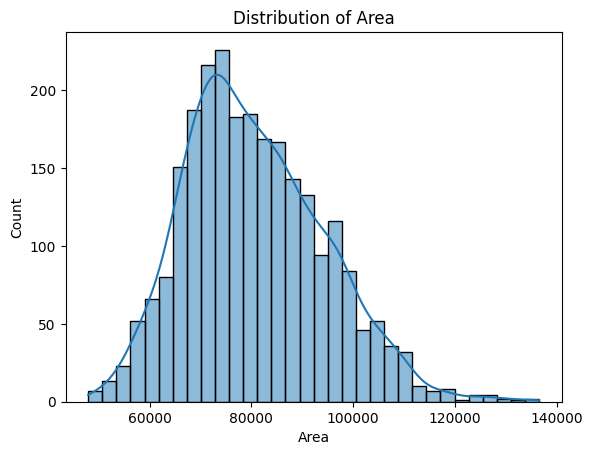

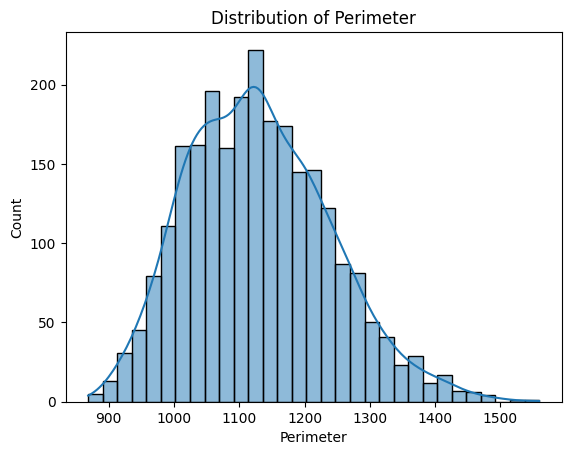

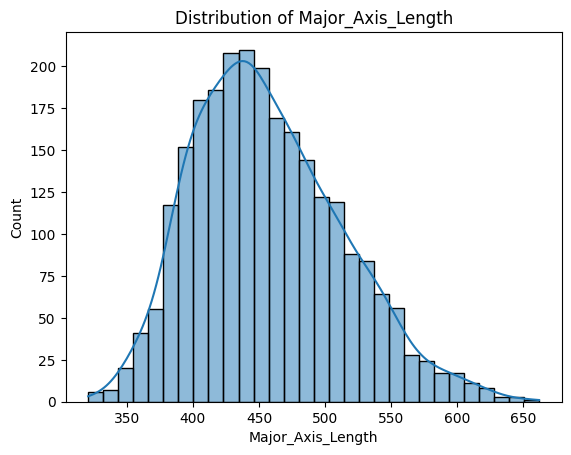

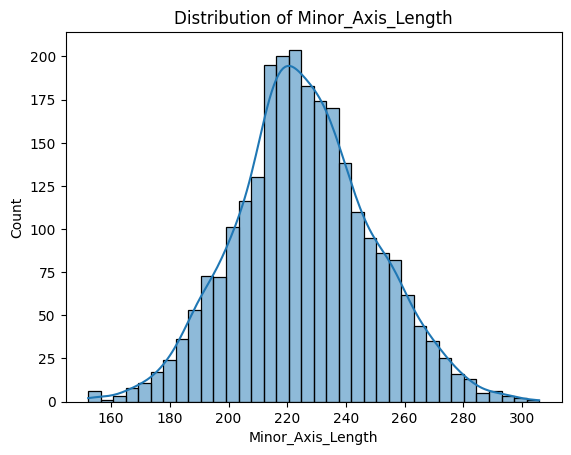

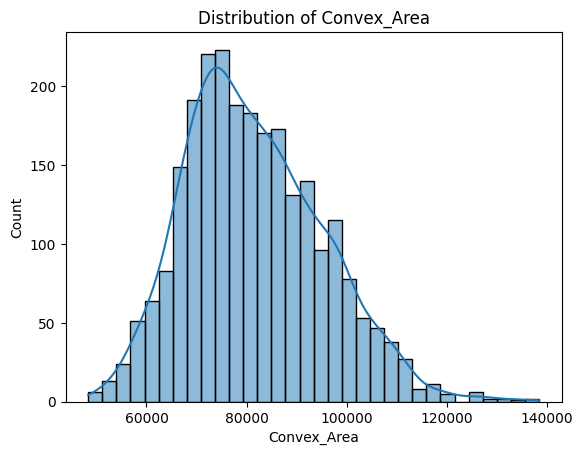

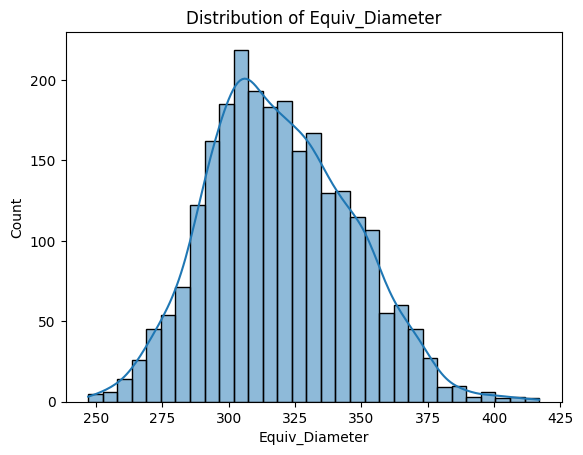

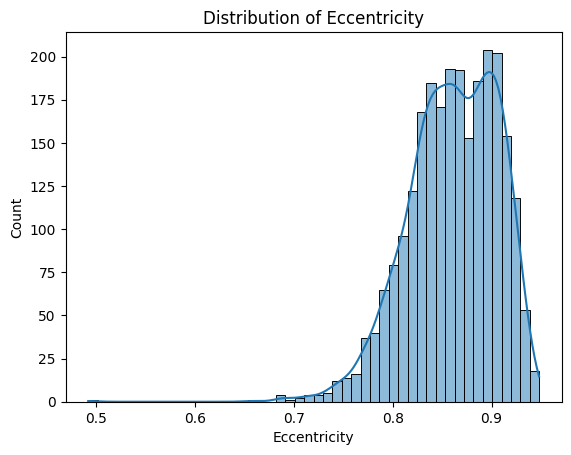

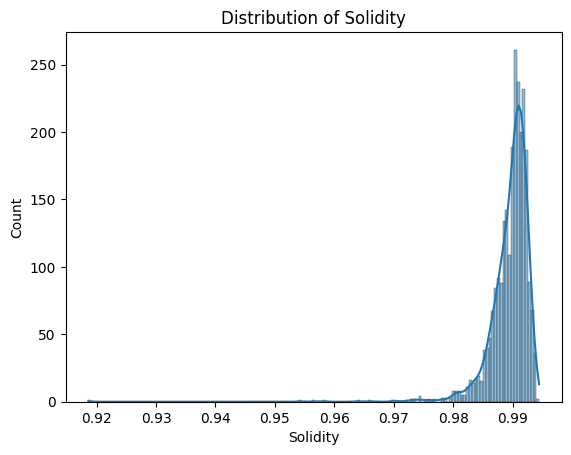

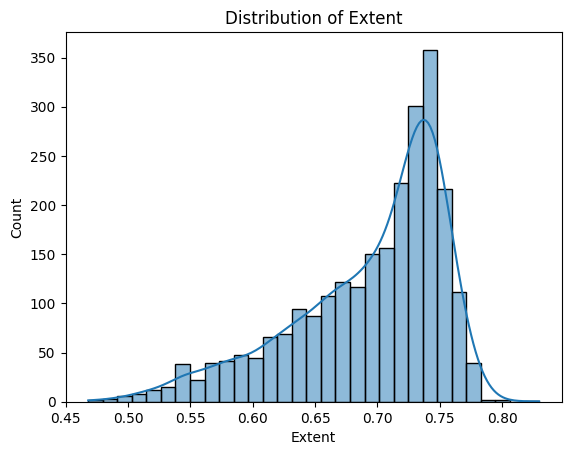

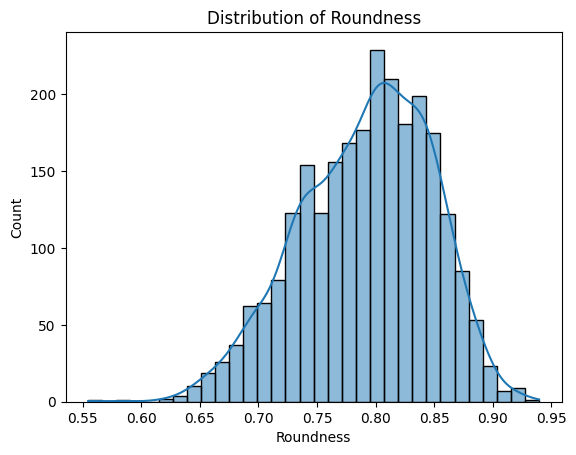

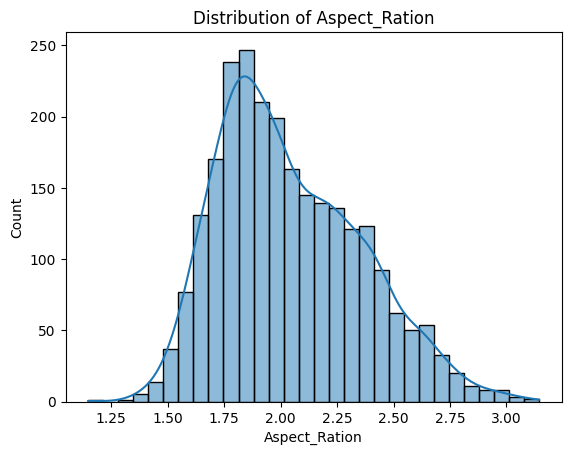

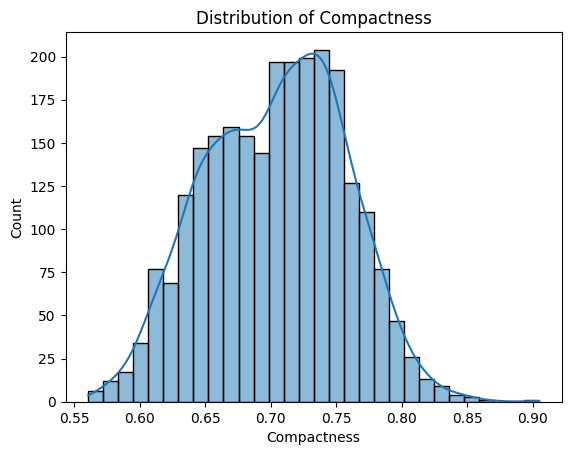

In [7]:
cols = [
'Area',
'Perimeter',
'Major_Axis_Length',
'Minor_Axis_Length',
'Convex_Area',
'Equiv_Diameter',
'Eccentricity',
'Solidity',
'Extent',
'Roundness',
'Aspect_Ration',
'Compactness'

]

for col in cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()



- Chúng ta sẽ cần xử lý lại dữ liệu ngoại lai của 'Eccentricity', 'solidity'. Thêm vào đó, xem xét để xử lý giới hạn của các đặc trưng còn lại
- Các giá trị đặt chưng để có thể đặt được phân phối chuẩn, sau đó có thể sữ dụng mô hình huấn luyện Logistic Regression.

**Phân tích Outliers**

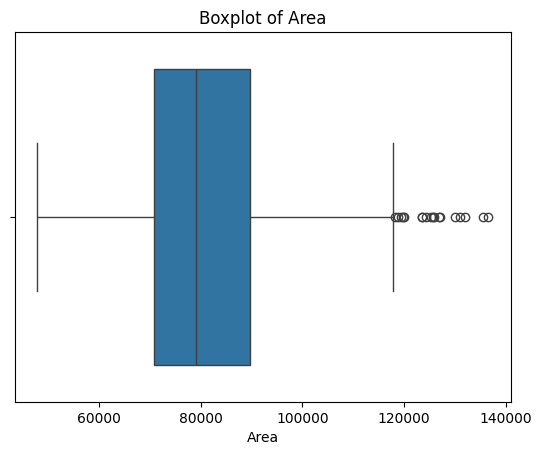

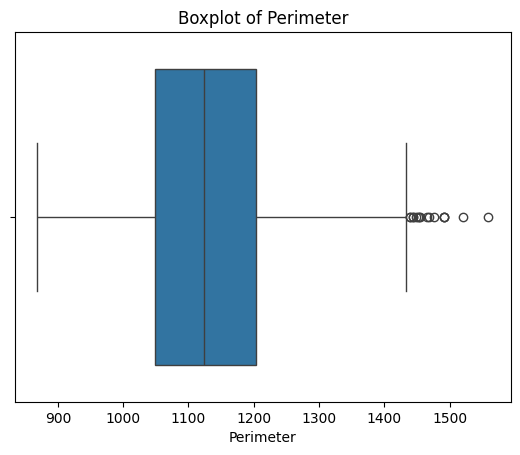

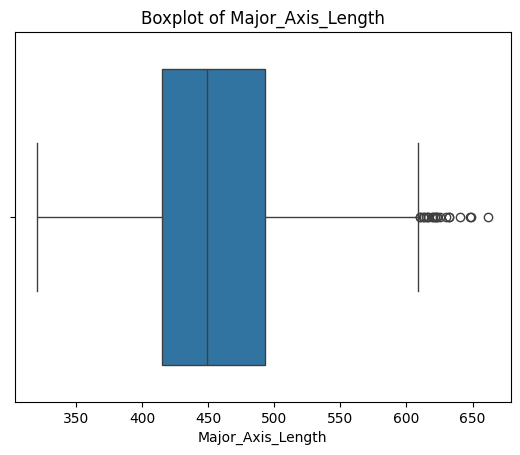

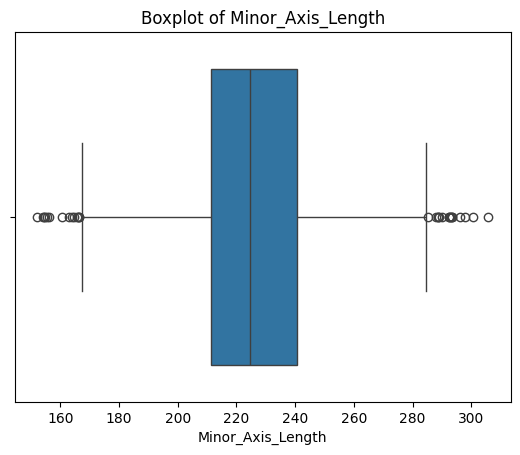

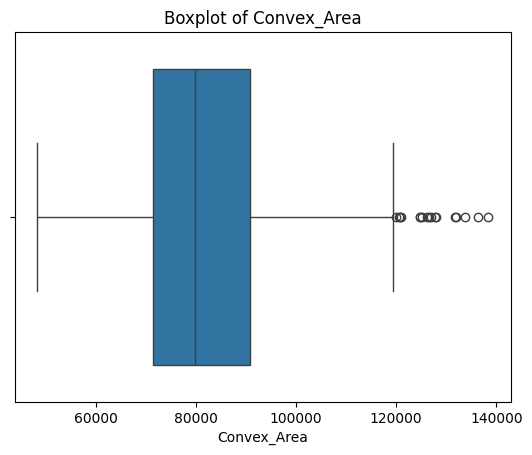

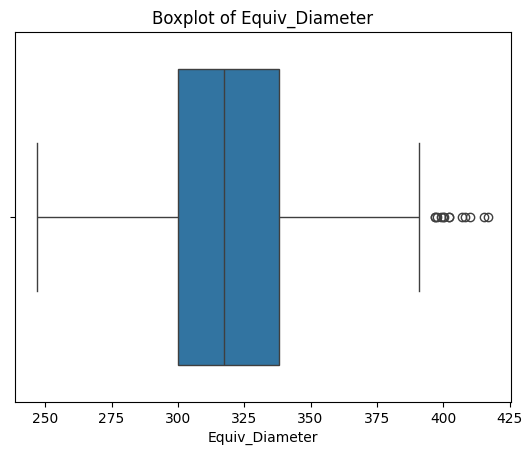

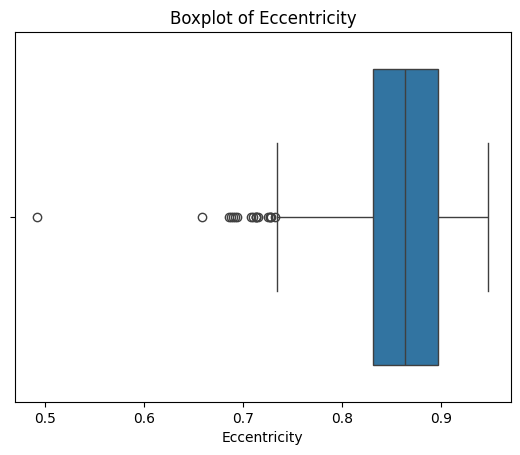

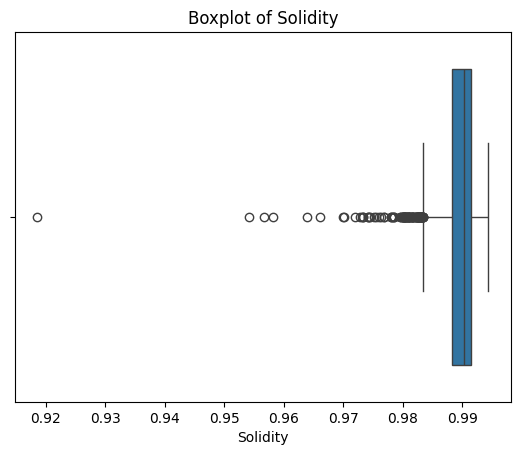

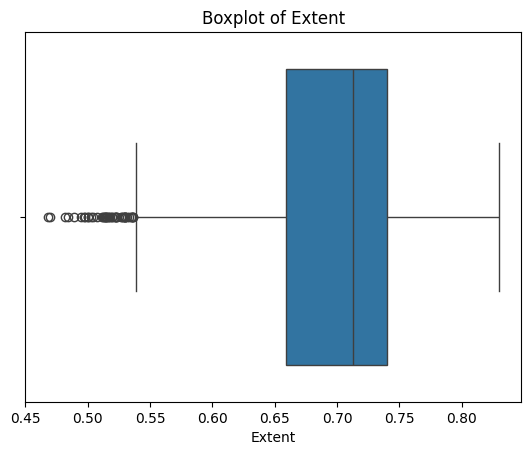

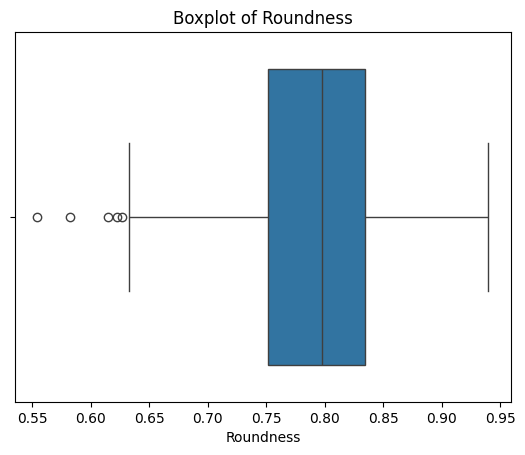

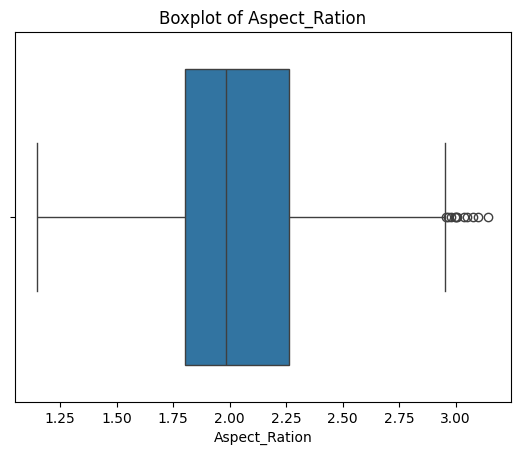

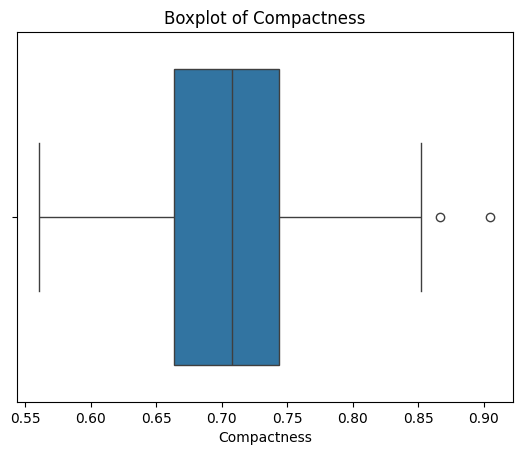

In [8]:
for col in cols:
  plt.figure()
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

Tập dữ liệu này có khá nhiều ouliers cần sữ lý

**Correlation Matrix**

Mã hoá output thành giá trị số [0,1]

In [9]:
df['Class'] = df['Class'].map({
    'Çerçevelik': 0,
    'Ürgüp Sivrisi': 1
})
df['Class'].isna().sum()

np.int64(0)

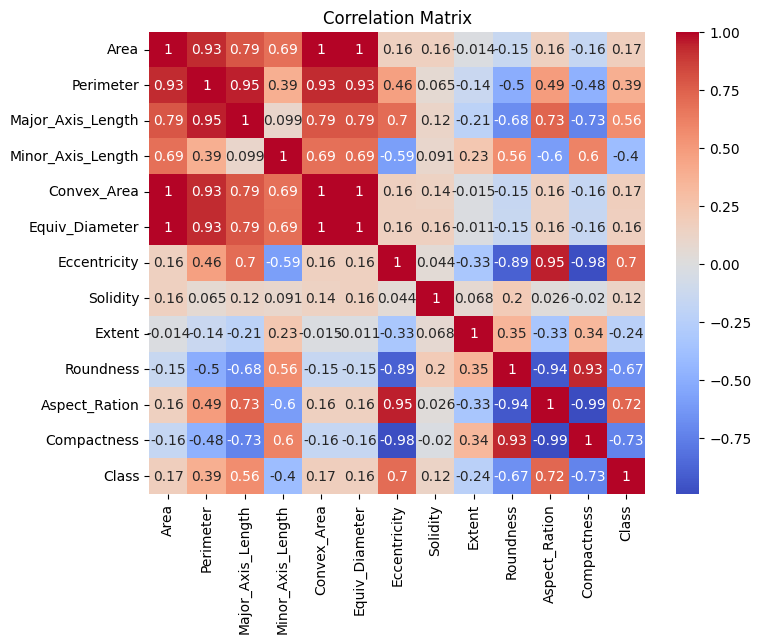

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df[cols + ['Class']].corr(),
annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Data Validation (Kiểm định dữ liệu):**

- Định nghĩa một "schema" (lược đồ) cho dữ liệu đầu vào (VD: tên cột, kiểu dữ liệu mong muốn, khoảng giá trị hợp lệ).

- Viết các hàm hoặc sử dụng thư viện để kiểm tra xem dữ liệu có tuân thủ schema hay không.

**Schema của bộ dữ liệu đầu vào:**



Sau khi EDA bộ dữ liệu, chúng ta sẽ gọi lại bộ dữ chính để tiến hành xữ lý

In [11]:

df.head()
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.0000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121,0.4800
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067,0.4997
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800,0.0000
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475,0.0000
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700,0.0000
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500,1.0000
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900,1.0000


Tạo Schame cho các Features và target của bài toán để dịnh nghĩa Schema, đồng thời giới hạn giá trị của chúng bằng phạm vi của giá trị đó ta đã quan sát được từ bước EDA dữ liệu:

In [12]:
DATA_SCHEMA = {
    "features": {
        "Area": {
            "dtype": "inter",
            "min": 1,
            "max": 136574
        },
        "Perimeter": {
            "dtype": "float",
            "min": 1,
            "max": 1559.45
        },
        "Major_Axis_Length": {
            "dtype": "float",
            "min": 1,
            "max": 661.911300
        },
        "Minor_Axis_Length": {
            "dtype": "float",
            "min": 1,
            "max": 305.818000
        },
        "Convex_Area": {
            "dtype": "inter",
            "min": 1,
            "max": 138384
        },
        "Equiv_Diameter": {
            "dtype": "float",
            "min": 1,
            "max": 417.0029
        },
        "Eccentricity": {
            "dtype": "float",
            "min": 0,
            "max": 1
        },
        "Solidity": {
            "dtype": "float",
            "min": 0,
            "max": 1
        },
        "Extent": {
            "dtype": "float",
            "min": 0,
            "max": 1
        },
        "Roundness": {
            "dtype": "float",
            "min": 0,
            "max": 1
        },
        "Aspect_Ration": {
            "dtype": "float",
            "min": 0,
            "max": 3.5
        },
        "Compactness": {
            "dtype": "float",
            "min": 0,
            "max": 1
        }

    },
    "target": {
        "Class": {
            "dtype": "int",
            "allowed_values": [0, 1]
        }
    }
}

**Hàm kiểm tra cột bị thiếu hoặc dư**

In [13]:

def check_columns(df, schema):
    expected_cols = list(schema["features"].keys()) + list(schema["target"].keys())
    missing = set(expected_cols) - set(df.columns)
    extra = set(df.columns) - set(expected_cols)
    return missing, extra
#Kích hoạt hàm để in ra giá trị bị thiếu, dư
missing_cols, extra_cols = check_columns(df, DATA_SCHEMA)
print("Missing columns:", missing_cols)
print("Extra columns:", extra_cols)

Missing columns: set()
Extra columns: set()


**Kiểm tra kiểu dữ liệu**

In [14]:
def check_dtypes(df, schema):
    errors = []
    for col, rules in schema["features"].items():
        if col not in df.columns:
            continue

        if rules["dtype"] == "float" and not pd.api.types.is_numeric_dtype(df[col]):
            errors.append(f"{col} should be numeric")

        if rules["dtype"] == "category":
            if not pd.api.types.is_object_dtype(df[col]):
                errors.append(f"{col} should be categorical")
    return errors
#Kiểm tra kiểu dữ liệu
dtype_errors = check_dtypes(df, DATA_SCHEMA)
print("Dtype errors:", dtype_errors)

Dtype errors: []


**Kiểm tra phạm vi giá trị hợp lệ**

In [15]:
def check_ranges(df, schema):
    range_errors = []
    for col, rules in schema["features"].items():
        if col not in df.columns:
            continue

        if rules["dtype"] == "float":
            if df[col].min() < rules["min"]:
                range_errors.append(f"{col} < {rules['min']}")
            if df[col].max() > rules["max"]:
                range_errors.append(f"{col} > {rules['max']}")
    return range_errors

range_errors = check_ranges(df, DATA_SCHEMA)
print("Range errors:", range_errors)

Range errors: []


**Kiểm tra giá trị hợp lệ của biến phân loại**

In [16]:
def check_categories(df, schema):
    errors = []
    for col, rules in schema["features"].items():
        if rules["dtype"] == "category":
            invalid = set(df[col].dropna().unique()) - set(rules["allowed_values"])
            if invalid:
                errors.append(f"{col} has invalid values: {invalid}")
    return errors

category_errors = check_categories(df, DATA_SCHEMA)
print("Category errors:", category_errors)

Category errors: []


**Kiểm tra biến mục tiêu (target)**

In [17]:
def check_target(df, schema):
    target_col = list(schema["target"].keys())[0]
    allowed = schema["target"][target_col]["allowed_values"]
    invalid_rows = df[~df[target_col].isin(allowed)]
    return invalid_rows.shape[0]

invalid_targets = check_target(df, DATA_SCHEMA)
print("Invalid target rows:", invalid_targets)

Invalid target rows: 0


**Tổng hợp Data Validation Report**

In [18]:
def validate_data(df, schema):
    missing, extra = check_columns(df, schema)
    dtype_err = check_dtypes(df, schema)
    range_err = check_ranges(df, schema)
    cat_err = check_categories(df, schema)
    target_err = check_target(df, schema)

    print("===== DATA VALIDATION REPORT =====")
    print("Missing columns:", missing)
    print("Extra columns:", extra)
    print("Dtype errors:", dtype_err)
    print("Range errors:", range_err)
    print("Category errors:", cat_err)
    print("Invalid target rows:", target_err)


In [19]:
validate_data(df, DATA_SCHEMA)

===== DATA VALIDATION REPORT =====
Missing columns: set()
Extra columns: set()
Dtype errors: []
Range errors: []
Category errors: []
Invalid target rows: 0


# Data Preparation & Feature Engineering (Chuẩn bị Dữ liệu & Kỹ thuật Đặc trưng):

- Xử lý giá trị thiếu: Điền giá trị thiếu (imputation) bằng các phương pháp như trung bình, trung vị, hoặc một giá trị mặc định.

- Xử lý biến phân loại (Categorical Features): Chuyển đổi các biến chữ thành số bằng các kỹ thuật như One-Hot Encoding hoặc Label Encoding.

- Chuẩn hóa dữ liệu (Feature Scaling): Áp dụng StandardScaler hoặc MinMaxScaler cho các biến số để đưa chúng về cùng một thang đo.

- Kỹ thuật đặc trưng: Tạo ra các đặc trưng mới từ những đặc trưng có sẵn để tăng hiệu quả của mô hình (VD: kết hợp 2 cột, trích xuất thông tin từ cột ngày tháng, tạo biến đa thức...).

**Xữ lý outliers bằng Phương pháp IQR đưa về giá trị trung vị**

In [20]:
def handle_outliers_iqr_median(df, column):
    # Tính toán IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 1. Tính giá trị mean của cột (trước khi xử lý)
    column_median = df[column].median()

    # 2. Xác định các vị trí là outliers
    outliers_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
    num_outliers = outliers_mask.sum()

    print(f"Cột {column}: Tìm thấy {num_outliers} điểm ngoại lai. Thay thế bằng mean: {column_median:.2f}")

    # 3. Thay thế các giá trị outliers bằng mean
    # Cách dùng np.where:
    df[column] = np.where(outliers_mask, column_median, df[column])

    # Hoặc cách dùng .loc (tương đương):
    # df.loc[outliers_mask, column] = column_mean

    return df

In [21]:
cols = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area',
        'Equiv_Diameter']

for col in cols:
    df = handle_outliers_iqr_median(df, col)

Cột Area: Tìm thấy 18 điểm ngoại lai. Thay thế bằng mean: 79076.00
Cột Perimeter: Tìm thấy 16 điểm ngoại lai. Thay thế bằng mean: 1123.67
Cột Major_Axis_Length: Tìm thấy 21 điểm ngoại lai. Thay thế bằng mean: 449.50
Cột Minor_Axis_Length: Tìm thấy 30 điểm ngoại lai. Thay thế bằng mean: 224.70
Cột Convex_Area: Tìm thấy 17 điểm ngoại lai. Thay thế bằng mean: 79872.00
Cột Equiv_Diameter: Tìm thấy 13 điểm ngoại lai. Thay thế bằng mean: 317.31


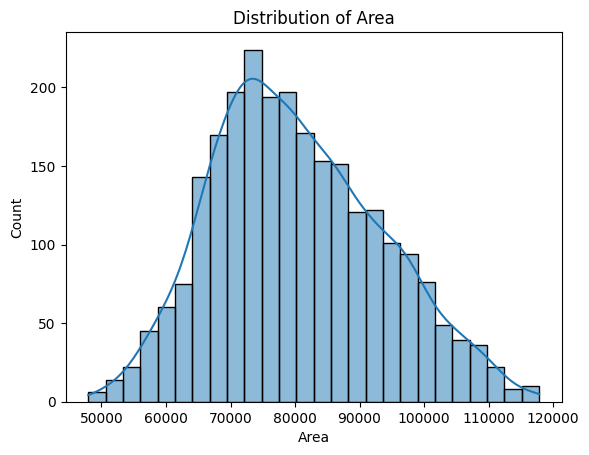

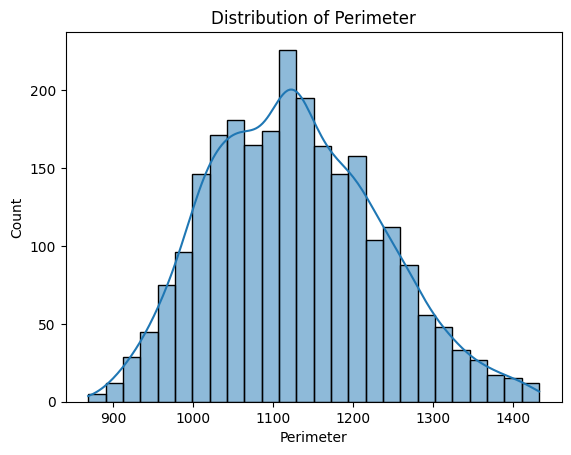

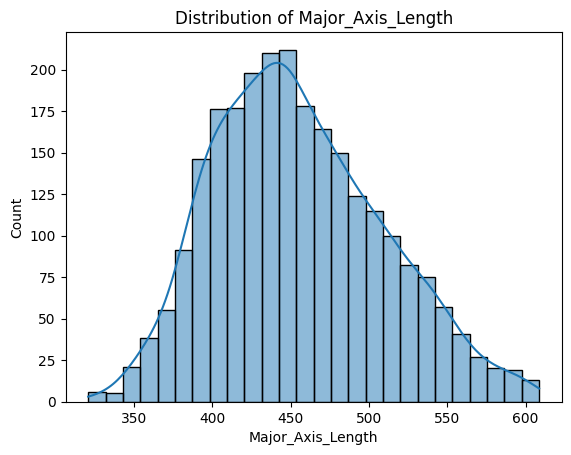

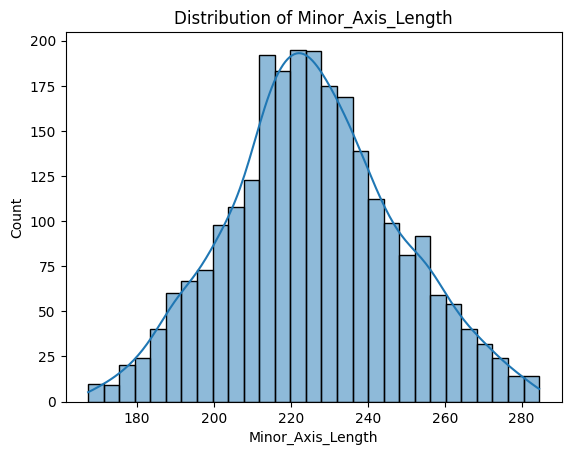

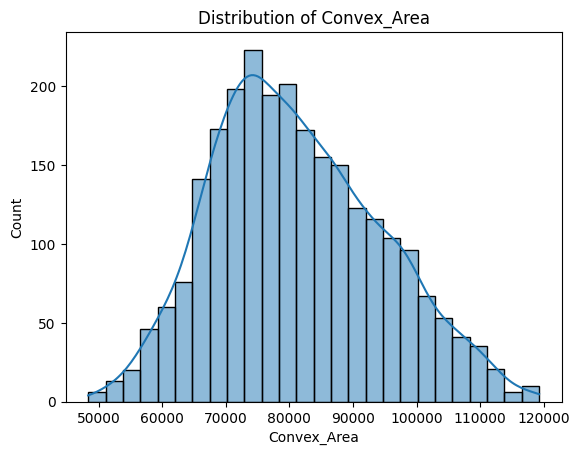

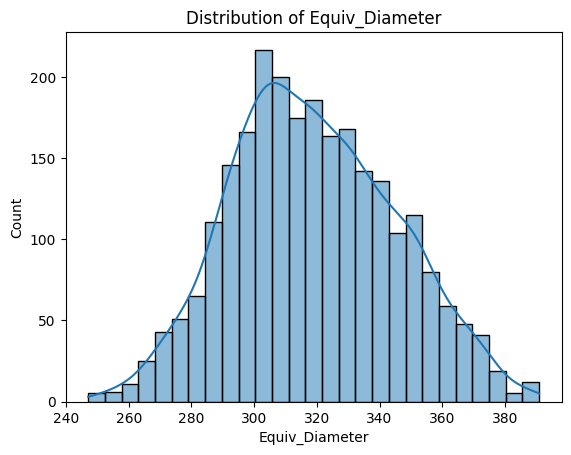

In [22]:
for col in cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


vì tập dữ liệu này có ma trận tương quan có các đặc trưng tương quan với nhau rất cao, ta sẽ phải xữ lý loại bỏ các đặt chưng đó, tiến hành xoá bớt các cột đặt trưng có có độ tương quan (corr) cao hơn 0.95 và thấp hơn -0.95

In [23]:
#xữ lý loại bỏ bớt cột features có |corr| >0.95
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [col for col in upper.columns if any(upper[col] > 0.95)]

In [24]:
df = df.drop(columns=to_drop)
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Solidity,Extent,Roundness,Class
0,56276.0,888.242,326.1485,220.2388,0.7376,0.9902,0.7453,0.8963,0
1,76631.0,1068.146,417.1932,234.2289,0.8275,0.9916,0.7151,0.8440,0
2,71623.0,1082.987,435.8328,211.0457,0.8749,0.9857,0.7400,0.7674,0
3,66458.0,992.051,381.5638,222.5322,0.8123,0.9902,0.7396,0.8486,0
4,66107.0,998.146,383.8883,220.4545,0.8187,0.9850,0.6752,0.8338,0


**Chia tập dữ liệu thành tập Features và target**

In [25]:
# 2. Preprocessing

X = pd.DataFrame(df.drop(columns=["Class"]))
y = df["Class"]


In [26]:
X

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Solidity,Extent,Roundness
0,56276.0,888.242,326.1485,220.2388,0.7376,0.9902,0.7453,0.8963
1,76631.0,1068.146,417.1932,234.2289,0.8275,0.9916,0.7151,0.8440
2,71623.0,1082.987,435.8328,211.0457,0.8749,0.9857,0.7400,0.7674
3,66458.0,992.051,381.5638,222.5322,0.8123,0.9902,0.7396,0.8486
4,66107.0,998.146,383.8883,220.4545,0.8187,0.9850,0.6752,0.8338
...,...,...,...,...,...,...,...,...
2495,79637.0,1224.710,533.1513,190.4367,0.9340,0.9907,0.4888,0.6672
2496,69647.0,1084.318,462.9416,191.8210,0.9101,0.9919,0.6002,0.7444
2497,87994.0,1210.314,507.2200,222.1872,0.8990,0.9920,0.7643,0.7549
2498,80011.0,1182.947,501.9065,204.7531,0.9130,0.9890,0.7374,0.7185


In [27]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
2495,1
2496,1
2497,1
2498,1


**Huấn luyện mô hình**

Các feature của bản dữ liệu có độ phân phối chuẩn, vì vậy chúng ta sẽ sử dụng các mô hình Logistic Regression để đánh giá sự thể hiện của các mô hình bằng F1 - score, ROC-AUC.

Mô hình Logistic Regression xữ lý outlier bằng IQR thay thế bằng trung vị và xữ lý loại bỏ 1 trong 2 cặp đặc trưng có |corr| >= 095.

In [28]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import joblib

# Transformer xử lý Outlier theo IQR
class OutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.bounds_ = {}
        self.medians_ = {}

    def fit(self, X, y=None):
        # Tính toán Q1, Q3, IQR và Mean dựa trên tập X truyền vào (thường là Train)
        for col in self.columns:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            self.bounds_[col] = (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
            self.medians_[col] = X[col].median()
        return self

    def transform(self, X):
        X_copy = X.copy().astype(float)
        for col in self.columns:
            lower_bound, upper_bound = self.bounds_[col]
            median_val = self.medians_[col]
            mask = (X_copy[col] < lower_bound) | (X_copy[col] > upper_bound)
            X_copy.loc[mask, col] = median_val
        return X_copy

# Transformer loại bỏ các cột có độ tương quan cao
class CorrelationDropper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.95):
        self.threshold = threshold
        self.to_drop_ = []

    def fit(self, X, y=None):
        corr_matrix = X.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        self.to_drop_ = [col for col in upper.columns if any(upper[col] > self.threshold)]
        return self

    def transform(self, X):
        return X.drop(columns=self.to_drop_)

In [29]:
# 1. Đọc dữ liệu
df = pd.read_excel('/content/Pumpkin_Seeds_Dataset.xlsx')
X = df.drop(columns=["Class"])
y = df["Class"]

# 2. Chia tập dữ liệu
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Danh sách cột cần xử lý outlier
cols_outliers = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area',
                 'Equiv_Diameter'
                ]

# 3. Tạo Pipeline
full_pipeline = Pipeline([
    ("outlier_remover", OutlierHandler(columns=cols_outliers)),
    ("corr_dropper", CorrelationDropper(threshold=0.95)),
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(penalty="l2", class_weight="balanced", max_iter=1000))
])

# 4. Huấn luyện (Pipeline sẽ fit các transformer chỉ trên X_train)
full_pipeline.fit(X_train, y_train)

# 5. Đánh giá
print("Train Score:", full_pipeline.score(X_train, y_train))
print("Val Score  :", full_pipeline.score(X_val, y_val))
print("Test Score :", full_pipeline.score(X_test, y_test))

y_pred = full_pipeline.predict(X_test)
# 6. Lưu Pipeline lại để sử dụng cho thực tế
joblib.dump(full_pipeline, 'model_pipeline.pkl')

Train Score: 0.8735
Val Score  : 0.872
Test Score : 0.848


['model_pipeline.pkl']

Accuracy: 0.85

Confusion Matrix:
 [[108  22]
 [ 16 104]]
               precision    recall  f1-score   support

   Çerçevelik       0.87      0.83      0.85       130
Ürgüp Sivrisi       0.83      0.87      0.85       120

     accuracy                           0.85       250
    macro avg       0.85      0.85      0.85       250
 weighted avg       0.85      0.85      0.85       250



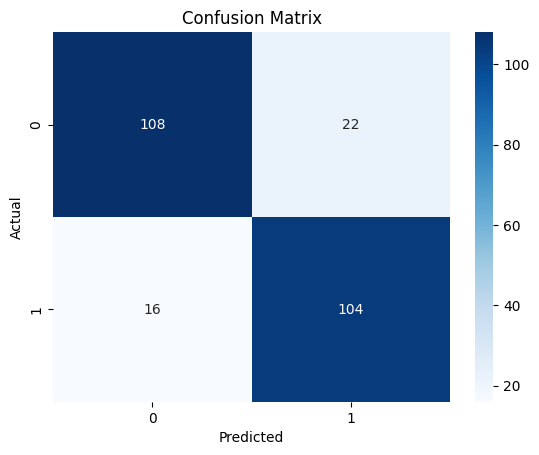

In [30]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Huấn Luyện mô hình SVM

In [31]:
from sklearn.svm import SVC # Import thêm thư viện SVM

# 1. Đọc dữ liệu
df = pd.read_excel('/content/Pumpkin_Seeds_Dataset.xlsx')
X = df.drop(columns=["Class"])
y = df["Class"]

# 2. Chia tập dữ liệu
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Danh sách cột cần xử lý outlier
cols_outliers = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area',
                 'Equiv_Diameter'
                ]

# 3. Tạo Pipeline với Support Vector Machine
full_pipeline = Pipeline([
    ("outlier_remover", OutlierHandler(columns=cols_outliers)),
    ("corr_dropper", CorrelationDropper(threshold=0.95)),
    ("scaler", StandardScaler()),
    # Thay LogisticRegression bằng SVC
    ("clf", SVC(kernel='rbf', C=1.0, class_weight="balanced", probability=True))
])

# 4. Huấn luyện (Pipeline sẽ fit các transformer chỉ trên X_train)
full_pipeline.fit(X_train, y_train)

# 5. Đánh giá
print("Train Score:", full_pipeline.score(X_train, y_train))
print("Val Score  :", full_pipeline.score(X_val, y_val))
print("Test Score :", full_pipeline.score(X_test, y_test))

y_pred = full_pipeline.predict(X_test)

# 6. Lưu Pipeline lại để sử dụng cho thực tế
joblib.dump(full_pipeline, 'model_svm_pipeline.pkl')



Train Score: 0.8925
Val Score  : 0.892
Test Score : 0.864


['model_svm_pipeline.pkl']

In [32]:
print(list(X_train.columns))

['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent', 'Roundness', 'Aspect_Ration', 'Compactness']


Accuracy: 0.86

Confusion Matrix:
 [[116  14]
 [ 20 100]]
               precision    recall  f1-score   support

   Çerçevelik       0.85      0.89      0.87       130
Ürgüp Sivrisi       0.88      0.83      0.85       120

     accuracy                           0.86       250
    macro avg       0.87      0.86      0.86       250
 weighted avg       0.86      0.86      0.86       250



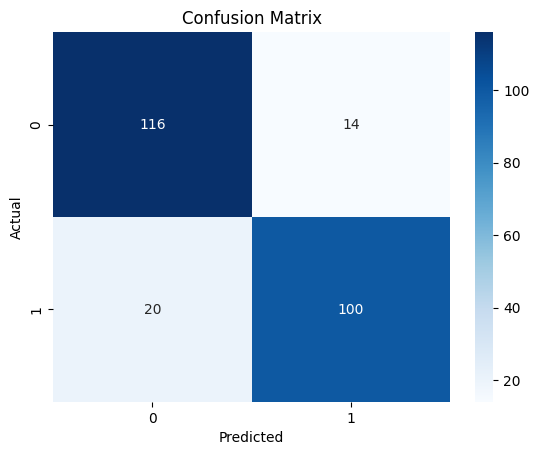

In [33]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Kết quả trên tập huấn luyện và tập kiểm tra có sự chênh lệch không đáng kể, cho thấy cả Logistic Regression và Support Vector Machine không bị overfitting và có khả năng tổng quát hóa tốt.

**Thử nghiệm tập dữ liệu với Deep Learning**

Vì Tệp dữ liệu được lấy trên Kaggle dưới dạng tabular, chúng ta sẽ sữ dụng mô hình deep learning MLP phù hợp cho dữ liệu loại bảng.

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

df = pd.read_excel('/content/Pumpkin_Seeds_Dataset.xlsx')

# Mã hoá đầu ra object thành  0 và 1
df['Class'] = df['Class'].map({
    'Çerçevelik': 0,
    'Ürgüp Sivrisi': 1
})
df['Class'].isna().sum()

# 2. Tách Feature (X) và Target (y) ngay từ đầu (chưa xử lý gì cả)
X = df.drop(columns=["Class"])
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Xữ lý outlier bằng IQR
cols_outliers = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area',
                 'Equiv_Diameter']

def handle_outliers_with_train_bounds_tensorflow(train_df, test_df, columns):
    # CHỈNH SỬA TẠI ĐÂY: Chuyển kiểu dữ liệu sang float để tránh cảnh báo dtype
    train_copy = train_df.astype(float)
    test_copy = test_df.astype(float)

    for col in columns:
        # Tính toán Q1, Q3 và IQR CHỈ dựa trên tập Train
        Q1 = train_copy[col].quantile(0.25)
        Q3 = train_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Giá trị trung vị để thay thế cũng tính từ tập Train
        median_val = train_copy[col].median()

        # Thay thế outlier ở cả 3 tập bằng giá trị Mean của tập Train
        for d in [train_copy, test_copy]:
            # Dùng .loc để gán giá trị mà không gây lỗi SettingWithCopy
            mask = (d[col] < lower_bound) | (d[col] > upper_bound)
            d.loc[mask, col] = median_val

    return train_copy, test_copy

X_train, X_test = handle_outliers_with_train_bounds_tensorflow(X_train.copy(), X_test.copy(), cols_outliers)


#xữ lý loại bỏ bớt cột features có |corr| >0.95
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [col for col in upper.columns if any(upper[col] > 0.95)]

# Loại bỏ các cột
X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)

#khởi tạo scaler
scaler = StandardScaler()
# Fit trên X_train và transform cả 2 tập
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),

    Dense(16, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC()]
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.3, # Chia 30% từ X_train để làm validation
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],

)


Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5771 - auc: 0.6642 - loss: 0.6933 - val_accuracy: 0.6567 - val_auc: 0.7469 - val_loss: 0.6300
Epoch 2/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6258 - auc: 0.6958 - loss: 0.6576 - val_accuracy: 0.6883 - val_auc: 0.7930 - val_loss: 0.6055
Epoch 3/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6468 - auc: 0.7700 - loss: 0.6229 - val_accuracy: 0.7217 - val_auc: 0.8210 - val_loss: 0.5842
Epoch 4/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6842 - auc: 0.8021 - loss: 0.5878 - val_accuracy: 0.7350 - val_auc: 0.8421 - val_loss: 0.5645
Epoch 5/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7005 - auc: 0.8195 - loss: 0.5895 - val_accuracy: 0.7433 - val_auc: 0.8559 - val_loss: 0.5475
Epoch 6/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7509 - auc: 0.8526 - loss: 0.5528 - val_accuracy: 0.7583 - val_auc: 0.8666 - val_loss: 0.5318
Epoch 7/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accu

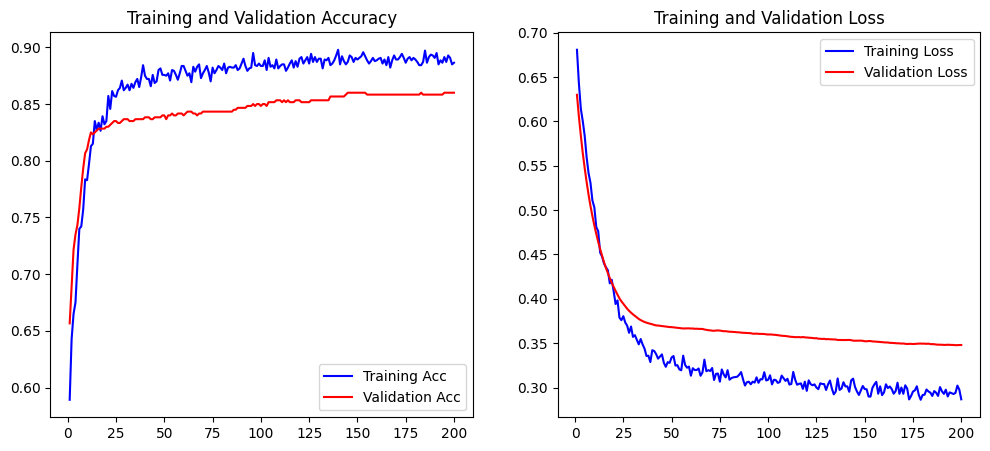

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


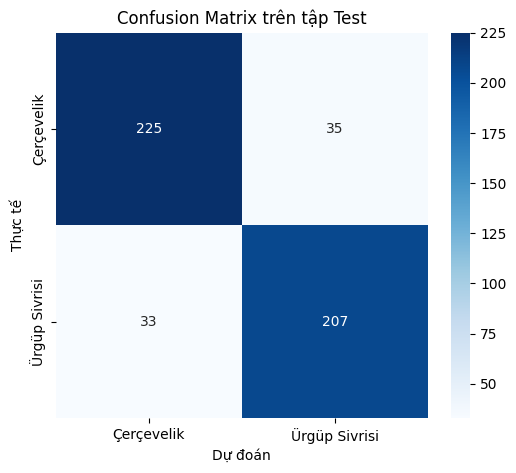

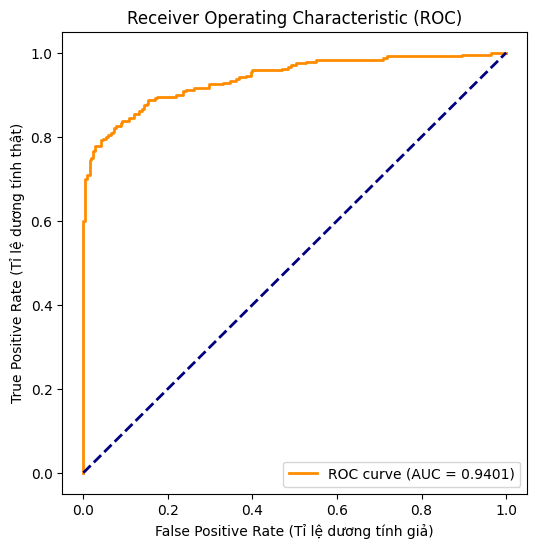


Báo cáo phân loại chi tiết:
               precision    recall  f1-score   support

   Çerçevelik       0.87      0.87      0.87       260
Ürgüp Sivrisi       0.86      0.86      0.86       240

     accuracy                           0.86       500
    macro avg       0.86      0.86      0.86       500
 weighted avg       0.86      0.86      0.86       500



In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

# --- 1. Vẽ đồ thị Loss và Accuracy (Learning Curves) ---
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Đồ thị Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Acc')
    plt.plot(epochs, val_acc, 'r', label='Validation Acc')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Đồ thị Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

plot_history(history)

# --- 2. Confusion Matrix (Ma trận nhầm lẫn) ---
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Çerçevelik', 'Ürgüp Sivrisi'],
            yticklabels=['Çerçevelik', 'Ürgüp Sivrisi'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Confusion Matrix trên tập Test')
plt.show()

# --- 3. ROC Curve (Đường cong ROC) ---
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (Tỉ lệ dương tính giả)')
plt.ylabel('True Positive Rate (Tỉ lệ dương tính thật)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# In thêm báo cáo chi tiết
print("\nBáo cáo phân loại chi tiết:")
print(classification_report(y_test, y_pred, target_names=['Çerçevelik', 'Ürgüp Sivrisi']))

In [36]:

# --- 1. Lưu mô hình TensorFlow/Keras ---
model.save('pumpkin_model.keras')

# --- 2. Lưu bộ tiền xử lý và thông tin đặc trưng ---
# Chúng ta cần lưu Scaler và danh sách các cột bị drop
# Ngoài ra, hàm xử lý outlier cần thông số Q1, Q3, Mean của tập Train
outlier_params = {}
for col in cols_outliers:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_params[col] = {
        'lower': Q1 - 1.5 * IQR,
        'upper': Q3 + 1.5 * IQR,
        'median': X[col].median()
    }

preprocessing_data = {
    'scaler': scaler,
    'to_drop': to_drop,
    'cols_outliers': cols_outliers,
    'outlier_params': outlier_params
}

joblib.dump(preprocessing_data, 'preprocessing_bundle.joblib')

print("Đã lưu mô hình và bộ tiền xử lý thành công!")

Đã lưu mô hình và bộ tiền xử lý thành công!


Tạo dữ liệu mới cho để tiến hành dự đoán sau này

In [40]:
import numpy as np
import pandas as pd

df = pd.read_excel('/content/Pumpkin_Seeds_Dataset.xlsx')
X = df.drop(columns=["Class"])
def generate_synthetic_inputs(X, n=100):
    # 1. Sinh dữ liệu ngẫu nhiên theo phân phối chuẩn
    df_synthetic = pd.DataFrame(
        np.random.normal(
            loc=X.mean(),
            scale=X.std(),
            size=(n, X.shape[1])
        ),
        columns=X.columns
    )

    # 2. Ràng buộc (Clip) giá trị trong khoảng [Min, Max] của dữ liệu gốc
    # axis=1 giúp mapping đúng tên cột giữa X và df_synthetic
    df_synthetic = df_synthetic.clip(lower=X.min(), upper=X.max(), axis=1)

    return df_synthetic

# Sử dụng
X_web_demo = generate_synthetic_inputs(X, 200)


In [41]:
X_web_demo

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,77555.079496,1214.240071,494.346970,212.028901,71879.958878,287.504148,0.790671,0.986767,0.707771,0.824386,2.139597,0.646612
1,90546.986335,1268.536860,502.125036,255.445047,78591.247995,288.903376,0.900317,0.987328,0.584099,0.816537,2.343619,0.663647
2,54979.347555,1094.976576,363.108693,208.895332,111658.354434,296.389706,0.873634,0.993461,0.621210,0.828052,2.052716,0.670205
3,57410.729363,1034.085374,457.547061,225.486976,63702.610763,281.732172,0.878445,0.994400,0.721179,0.777227,1.897938,0.701425
4,66833.745510,911.302102,466.378884,238.841030,72051.176038,379.225883,0.834235,0.989167,0.662026,0.834209,2.616233,0.617999
...,...,...,...,...,...,...,...,...,...,...,...,...
195,81157.720441,1082.376132,581.569577,231.397741,68028.066801,300.376964,0.913854,0.992463,0.590843,0.752405,1.922216,0.735791
196,92202.818743,1066.923135,473.220129,191.283554,62178.916153,327.919365,0.792752,0.991796,0.752942,0.815481,2.526009,0.743992
197,59608.198823,1113.665029,416.851829,230.160099,82461.943200,336.240735,0.916755,0.992076,0.758893,0.788063,2.075959,0.783205
198,108757.993172,1100.003908,481.425497,296.005186,93902.031735,309.176932,0.849836,0.987863,0.709801,0.751137,2.471551,0.699425


In [42]:
# 1. Lưu thành file CSV
X_web_demo.to_csv('X_web_demo.csv', index=False)

# 2. Lưu thành file Excel (XLSX)
X_web_demo.to_excel('X_web_demo.xlsx', index=False)

print("Đã lưu xong 2 file: X_web_demo.csv và X_web_demo.xlsx")

Đã lưu xong 2 file: X_web_demo.csv và X_web_demo.xlsx
